# Exercise 1

In [1]:
from Automata import Automata
from utils import visualize, plotTask5Test4

import math
import random

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Task 1 - Setting up the modeling environment

Scenario to show that our implementation allows for different pedestrians and obstacles editing an easy JSON file (using as input for the automata the file path) or writing in a notebook a dictionary as follow: 

In [44]:
configTask1 = {
    "name": "Task1Scenario",
    "dimensions": {
        "width": 5,
        "height": 5
    },
    "pedestrians": [
        [1, 0, 2]
    ],
    "targets": [
        [[1], 4, 2]
    ],
    "obstacles": [
        [2, 2], [2, 1], [2, 3]
    ]
}

In [45]:
task1Automata = Automata(configTask1)

Let's take a look at the initial state:

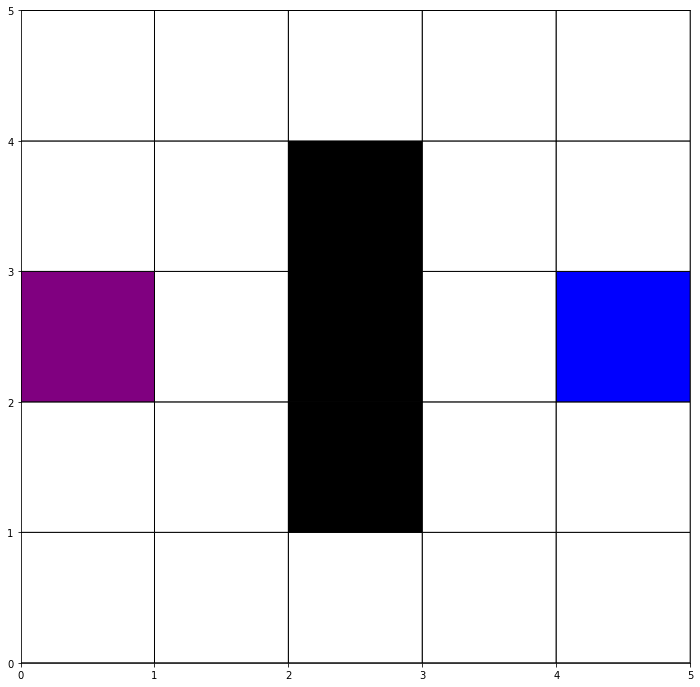

In [46]:
visualize(task1Automata.getState())

Let's simulate for 10 time steps and let's take a look at the final state with the followed path:

In [47]:
task1Automata.simulate(task1Automata.basicOperator, 10, avoidObstacles=True)

Simulation finished after 5 steps. All pedestrians achieved their targets.


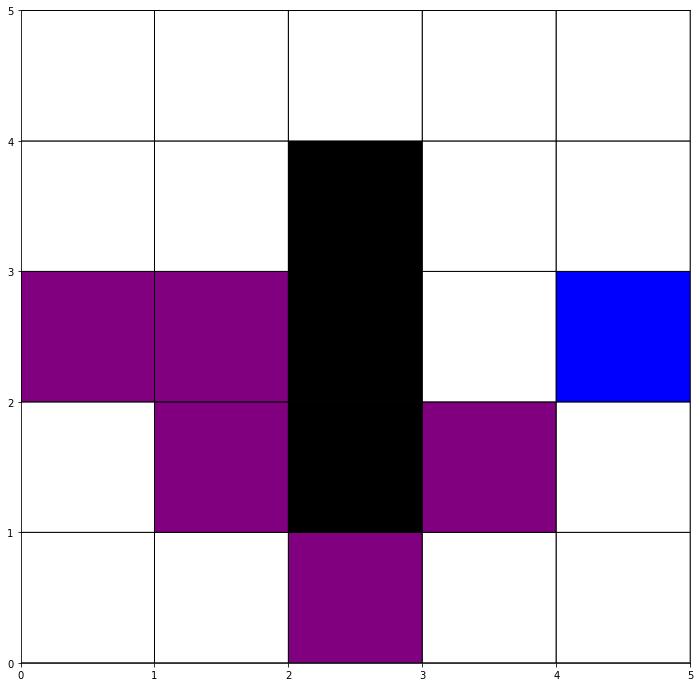

In [48]:
visualize(task1Automata.getStateWithPaths())

## Task 2 - First step of a single pedestrian

Scenario:
- 50 by 50 cells (2500 in total)
- Single pedestrian at position (5, 25)
- Target at (25, 25)

In [49]:
configTask2 = {
    "name": "Task2Scenario",
    "dimensions": {
        "width": 49,
        "height": 49
    },
    "pedestrians": [
        [1, 4, 24]
    ],
    "targets": [
        [[1], 24, 24]
    ],
    "obstacles": []
}

In [50]:
task2Automata = Automata(configTask2)

Let's take a look at the initial state:

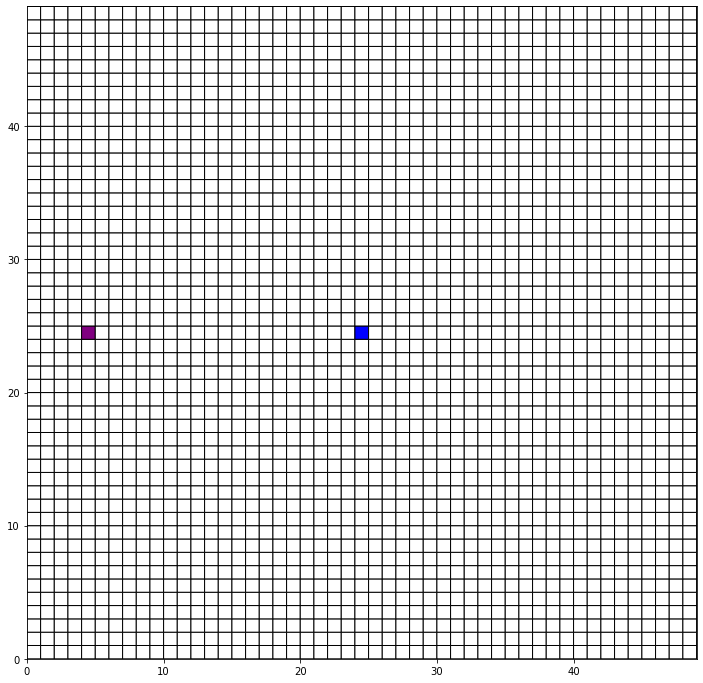

In [51]:
visualize(task2Automata.getState())

Let's simulate for 25 time steps and let's take a look at the final state with the followed path:

In [52]:
task2Automata.simulate(task2Automata.basicOperator, 25)

Simulation finished after 20 steps. All pedestrians achieved their targets.


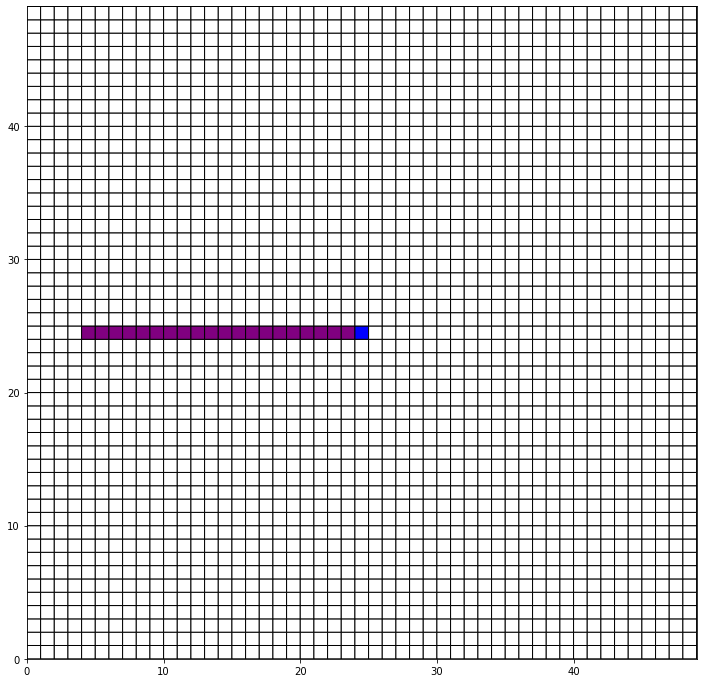

In [53]:
visualize(task2Automata.getStateWithPaths())

## Task 3 - Interaction of pedestrians

Scenario:
- 50 by 50 cells (2500 in total)
- 5 equidistant pedestrians on the same circle 
- 1 single target for all of them
- 25 Steps

In [74]:
# First we need to find 5 equidistant points on our circle with r = 20 and center (25,25)
points = []
no_points = 5
for i in range(no_points):
    x = int(25.0 + 20 * math.cos(2 * math.pi * i / no_points))
    y = int(25.0 + 20 * math.sin(2 * math.pi * i / no_points))
    points.append((x,y))

# We have now our final points
print(points)

[(45, 25), (31, 44), (8, 36), (8, 13), (31, 5)]


In [75]:
configTask3 = {
    "name": "Task3Scenario",
    "dimensions": {
        "width": 49,
        "height": 49
     },
    "pedestrians": [
        [1, 45, 25], [2, 31, 44], [3, 8, 36], [4, 8, 13], [5, 31, 5]
     ],
     "targets": [
        [[1,2,3,4,5], 24, 24]
     ],
     "obstacles": []
}

In [76]:
task3Automata = Automata(configTask3)

Let's take a look at the initial state:

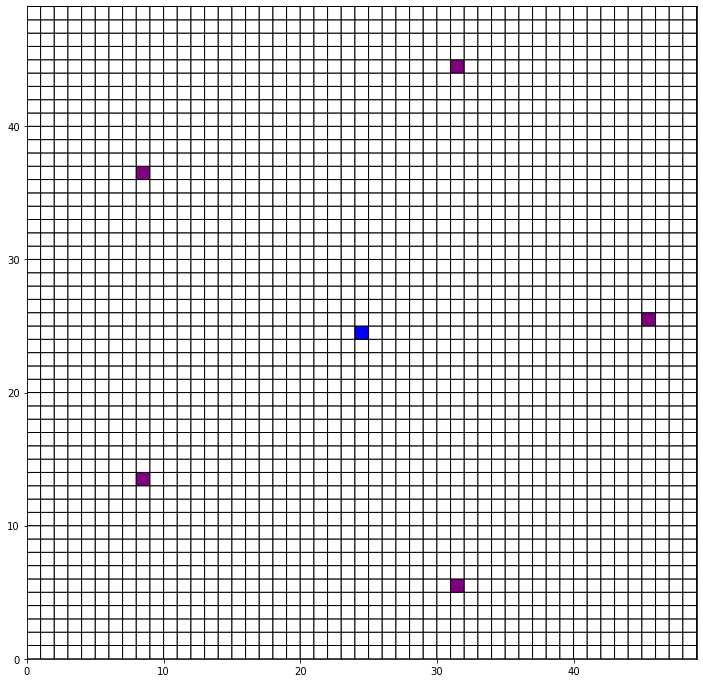

In [77]:
visualize(task3Automata.getState())

Let's simulate for 25 time steps **avoiding pedestrians** and let's take a look at the final state with the followed paths:

In [78]:
task3Automata.simulate(task3Automata.basicOperator, 25, avoidPedestrians=True)

Simulation finished after 21 steps. All pedestrians achieved their targets.


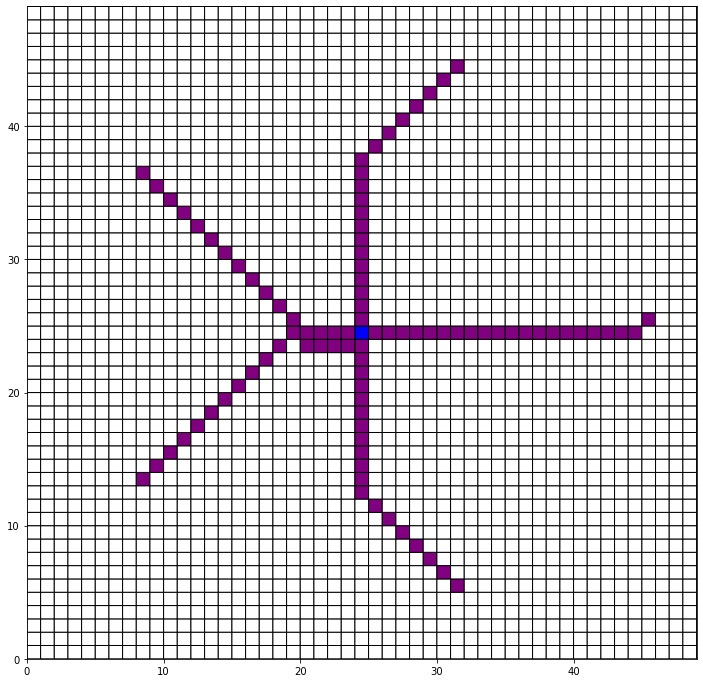

In [79]:
visualize(task3Automata.getStateWithPaths())

Let's take a look at the steps:

In [80]:
paths = task3Automata.getPaths()
for path in paths:
    print(len(paths[path]))

21
20
16
16
19


Let's simulate for 25 time steps **without avoiding pedestrians** and let's take a look at the final state with the followed paths:

In [81]:
task3Automata = Automata(configTask3)
task3Automata.simulate(task3Automata.basicOperator, 25, avoidPedestrians=False)

Simulation finished after 21 steps. All pedestrians achieved their targets.


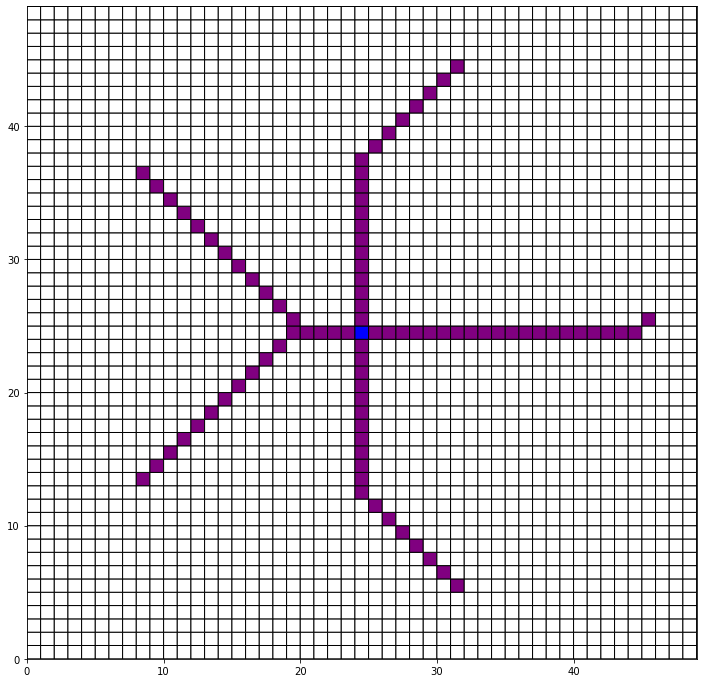

In [82]:
visualize(task3Automata.getStateWithPaths())

Let's take a look at the steps:

In [83]:
paths = task3Automata.getPaths()
for path in paths:
    print(len(paths[path]))

21
20
16
16
19


## Task 4 - Obstacle avoidance

### Scenario 4.1 - What happens in the scenario shown in figure (10) of [8] (bottleneck), if obstacle avoidance is not implemented?

In [5]:
pedestrians = []
id = 1

# Create pedestrians
for i in range (1, 10):
    for j in range(2, 19):
        pedestrians.append([id, i, j, 0])
        id = id + 1
        if id == 151:
            break

# Distribute velocities
bunchSize = 25 # 150 pedestrians / 6 generations (20, 30, 40, 50, 60, 70)
for i in range(0, 150):
    if i < bunchSize: # 70s
        pedestrians[i][3] = random.uniform(1.07, 1.07)
    elif i < bunchSize*2: # 60s
        pedestrians[i][3] = random.uniform(1.27, 1.27)
    elif i < bunchSize*3: # 50s
        pedestrians[i][3] = random.uniform(1.39, 1.43)
    elif i < bunchSize*4: # 40s
        pedestrians[i][3] = random.uniform(1.46, 1.5)
    elif i < bunchSize*5: # 30s
        pedestrians[i][3] = random.uniform(1.52, 1.56)
    else: # 20s
        pedestrians[i][3] = random.uniform(1.6, 1.64)
        
configTask41 = {
    "name": "Task41Scenario",
    "dimensions": {
        "width": 71,
        "height": 22
    },
    "pedestrians": pedestrians,
    "targets": [
        [[i for i in range(1, 150)], 65, 10],
    ],
    "obstacles": [[20, i] for i in range(0, 22) if not i == 10 and not i == 11] + \
    [[i, 9] for i in range(21, 30)] + \
    [[i, 12] for i in range(21, 30)] + \
    [[30, i] for i in range(0, 22) if not i == 10 and not i == 11] + \
    [[51, i] for i in range(0, 22) if not i == 10 and not i == 11],
    "step": 0.5
}

task41Automata = Automata(configTask41)

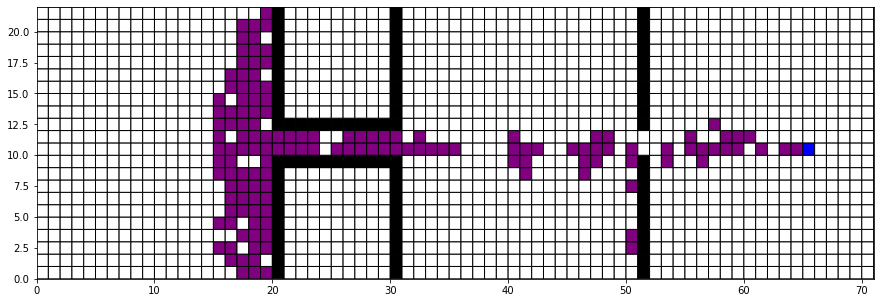

Simulation finished after 20 seconds.


In [6]:
task41Automata.simulateAndVisualizeWithTime(task41Automata.operatorWithCostFunctionRiMEA, 20, size = (15, 5), avoidObstacles=False)

### Scenario 4.2 - What happens for the "chicken test" scenario, figure 5?

**Without obstacle avoidance** and for 20 steps:

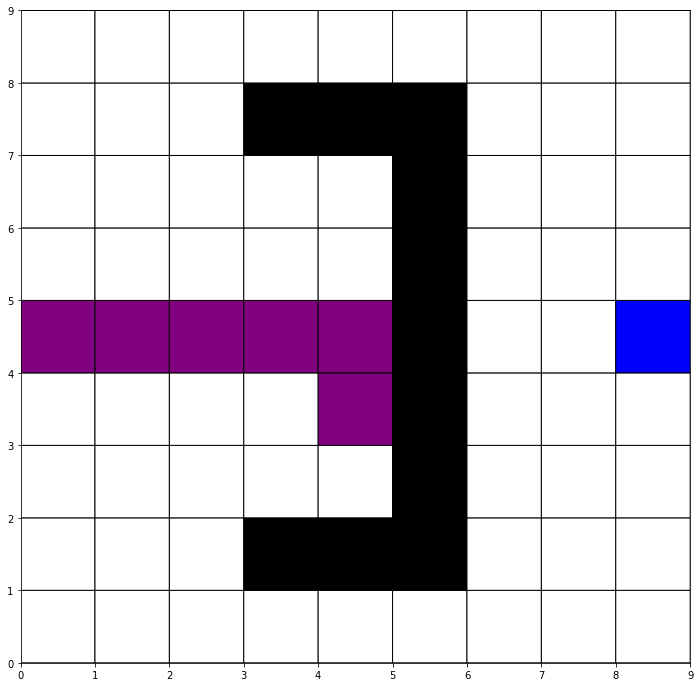

In [84]:
configTask42 = {
    "name": "Task42Scenario",
    "dimensions": {
        "width": 9,
        "height": 9
    },
    "pedestrians": [
        [1, 0, 4]
    ],
    "targets": [
        [[1, 2], 8, 4]
    ],
    "obstacles": [
        [3, 1], [4, 1], [5, 1], [5, 3], [5, 4], [5, 5], [5, 7], [4, 7], [3, 7], [5, 2], [5, 6]
    ]
}
task42Automata = Automata(configTask42)
task42Automata.simulate(task42Automata.operatorWithCostFunction, 20, avoidObstacles = False)
visualize(task42Automata.getStateWithPaths())

**With obstacle avoidance** and for 20 steps:

Simulation finished after 10 steps. All pedestrians achieved their targets.


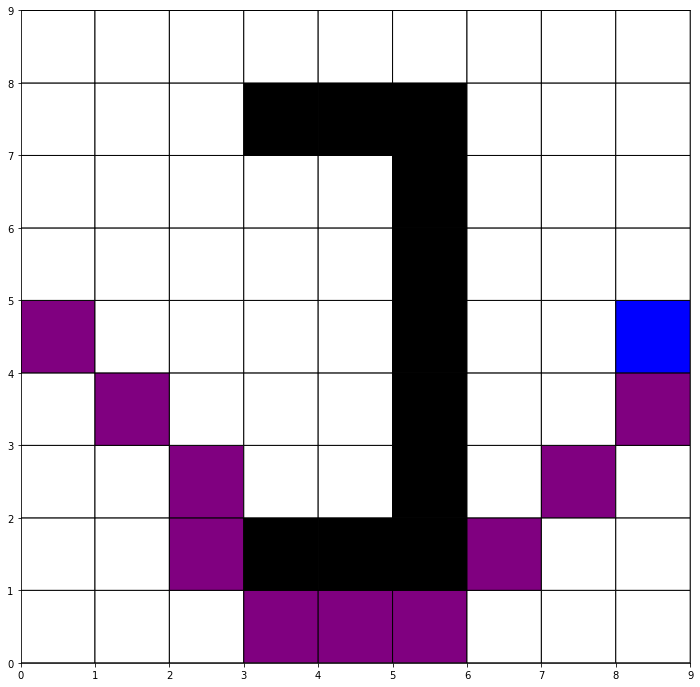

In [85]:
task42Automata = Automata(configTask42)
task42Automata.simulate(task42Automata.operatorWithCostFunction, 20, avoidObstacles = True)
visualize(task42Automata.getStateWithPaths())

## Task 5 - Tests

### TEST1: RiMEA scenario 1 (straight line, ignore premovement time)

In [136]:
rimea1 = {
    "name": "Task5TEST1",
    "dimensions": {
        "width": 80,
        "height": 4
    },
    "pedestrians": [
        [1, 0, 1, 1.33]
    ],
    "targets": [
        [[1], 79, 1]
    ],
    "obstacles": [],
    "step": 0.5
}

rimea1Automata = Automata(rimea1)

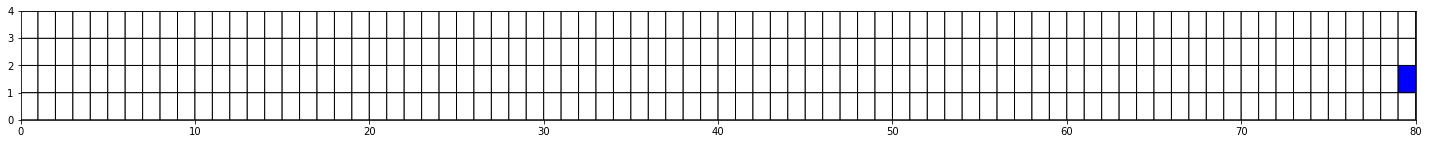

Simulation finished after 31 seconds. All pedestrians achieved their targets.


In [137]:
rimea1Automata.simulateAndVisualizeWithTime(rimea1Automata.operatorWithCostFunctionRiMEA, 50, size = (25, 2))

### TEST2: RiMEA scenario 4 (fundamental diagram, be careful with periodic boundary conditions)

In [ ]:
rimea2 = {
    "name": "Task5TEST2",
    "dimensions": {
        "width": 24,
        "height": 24
    },
    "pedestrians": [],
    "targets": [
        [], _, _]
    ],
    "obstacles": [],
    "step": 0.5
}

rimea2Automata = Automata(rimea2)

In [ ]:
rimea2Automata.simulateAndVisualizeWithTime(rimea2Automata.operatorWithCostFunctionRiMEA, 80, size = (15, 15))

### TEST3: RiMEA scenario 6 (movement around a corner)

In [138]:
ob = []
for i in range(0, 20):
    ob.append([i, 4])
    
for i in range(4, 24):
    ob.append([19, i])    
    
ped = []
id = 1
for i in range(0, 10, 2):
    ped.append([id, i, 0, 0.5])
    id += 1
    
for i in range(0, 10, 2):
    ped.append([id, i, 2, 0.5])
    id += 1
    
    
for i in range(1, 10, 2):
    ped.append([id, i, 1, 0.5])
    id += 1
    
for i in range(1, 11, 2):
    ped.append([id, i, 3, 0.5])
    id += 1
    if (id == 21):
        break
    
rimea3 = {
    "name": "Task5TEST3",
    "dimensions": {
        "width": 24,
        "height": 24
    },
    "pedestrians": ped,
    "targets": [
        [[i for i in range(1, 21)], 21, 23]
    ],
    "obstacles": ob,
    "step": 0.5
}

rimea3Automata = Automata(rimea3)

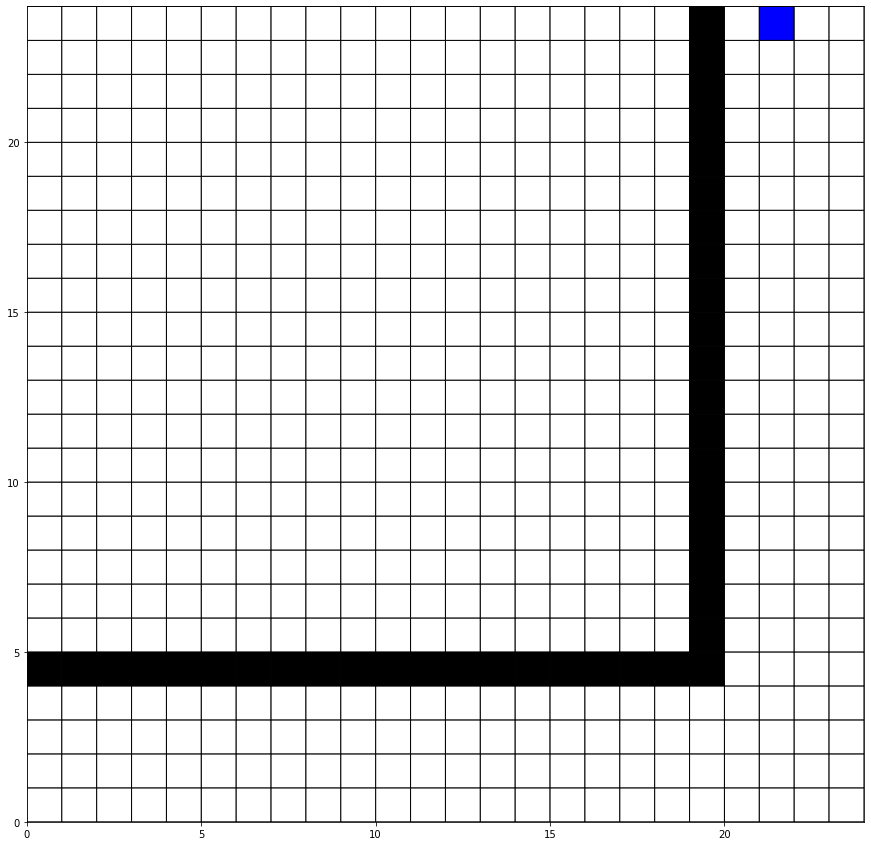

Simulation finished after 48 seconds. All pedestrians achieved their targets.


In [140]:
rimea3Automata.simulateAndVisualizeWithTime(rimea3Automata.operatorWithCostFunctionRiMEA, 80, size = (15, 15))

### TEST4: RiMEA scenario 7 (demographic parameters, visual comparison of  gure and results is suffcient. Simple and correct statistical test gives 5 bonus points if you argue why your choice of test is correct).

In [211]:
ped = []
id = 1

# 20s
for i in range(0, 24, 3):
    ped.append([id, i, 0, random.uniform(1.6, 1.64)])
    id += 1
    
for i in range(1, 20, 3):
    ped.append([id, i, 20, random.uniform(1.6, 1.64)])
    id += 1

# 30s
for i in range(0, 23, 3):
    ped.append([id, i, 4, random.uniform(1.52, 1.56)])
    id += 1
    
# 40s    
for i in range(1, 20, 3):
    ped.append([id, i, 8, random.uniform(1.46, 1.5)])
    id += 1

# 50s    
for i in range(1, 20, 3):
    ped.append([id, i, 12, random.uniform(1.39, 1.43)])
    id += 1

# 60s    
for i in range(1, 20, 3):
    ped.append([id, i, 16, random.uniform(1.27, 1.27)])
    id += 1

# 70s    
for i in range(1, 20, 3):
    ped.append([id, i, 23, random.uniform(1.07, 1.07)])
    id += 1
    if (id == 51):
        break
        
        
# 20s: 1 - 8 & 38 - 44
# 30s: 9 - 16
# 40s: 17 - 23
# 50s: 24 - 30
# 60s: 31 - 37
# 70s: 45 - 50

rimea4 = {
    "name": "Task5TEST4",
    "dimensions": {
        "width": 24,
        "height": 24
    },
    "pedestrians": ped,
    "targets": [
        [[i for i in range(1, 51)], 23, 12]
    ],
    "obstacles": [],
    "step": 0.5
}

rimea4Automata = Automata(rimea4)

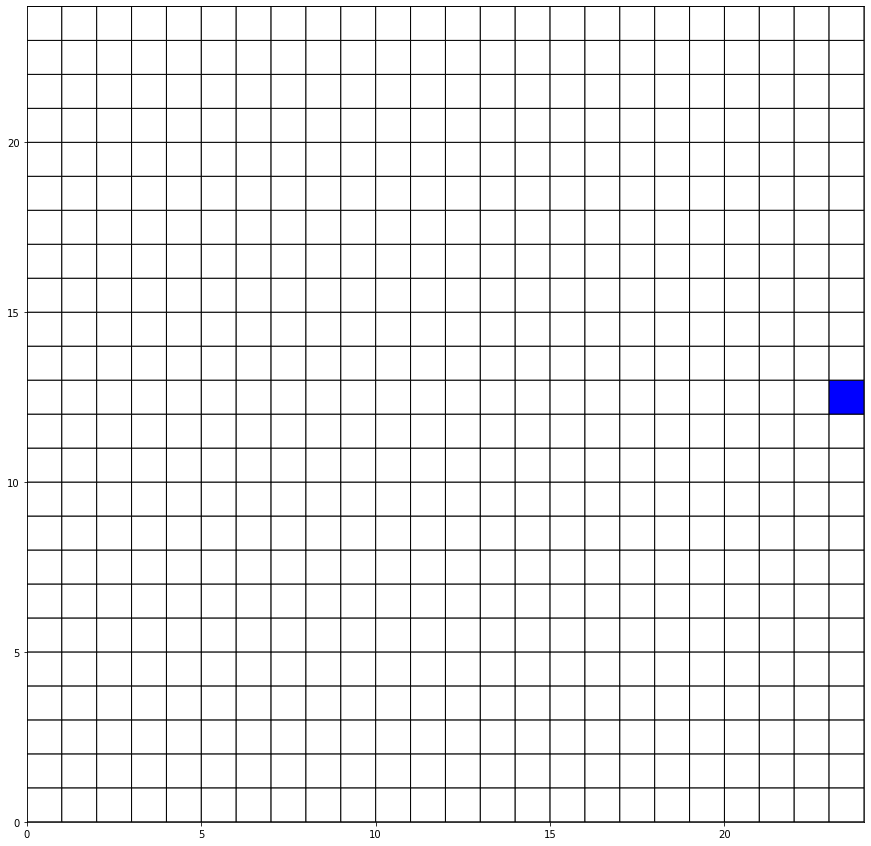

Simulation finished after 12 seconds. All pedestrians achieved their targets.


In [212]:
rimea4Automata.simulateAndVisualizeWithTime(rimea4Automata.operatorWithCostFunctionRiMEA, 80, size = (15, 15))

Let's obtain the plot with the average speeds

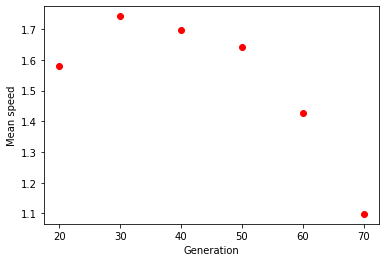

In [213]:
# 20s: 1 - 8 & 38 - 44
# 30s: 9 - 16
# 40s: 17 - 23
# 50s: 24 - 30
# 60s: 31 - 37
# 70s: 45 - 50
twenties = [i for i in range(1, 9)] + [i for i in range(38, 45)]
thirties = [i for i in range (9, 17)]
forties = [i for i in range(17, 24)]
fifties = [i for i in range(24, 31)]
sixties = [i for i in range(31, 37)]
seventies = [i for i in range(45, 51)]

generations = (twenties, thirties, forties, fifties, sixties, seventies)

plotTask5Test4(generations, rimea4Automata)